### import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

### load the data

In [2]:
df=pd.read_csv(r'Cellphone.csv')
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


### change the position of columns

In [3]:
new_cols = ['Product_id','Sale','weight','resoloution','ppi','cpu core','cpu freq','internal mem','ram','RearCam','Front_Cam','battery','thickness','Price']
df=df[new_cols]

### check for the missing values(do we have?)

In [4]:
df.isna().sum()

Product_id      0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
Price           0
dtype: int64

### plot the corrolation matrix to see are all features related to target


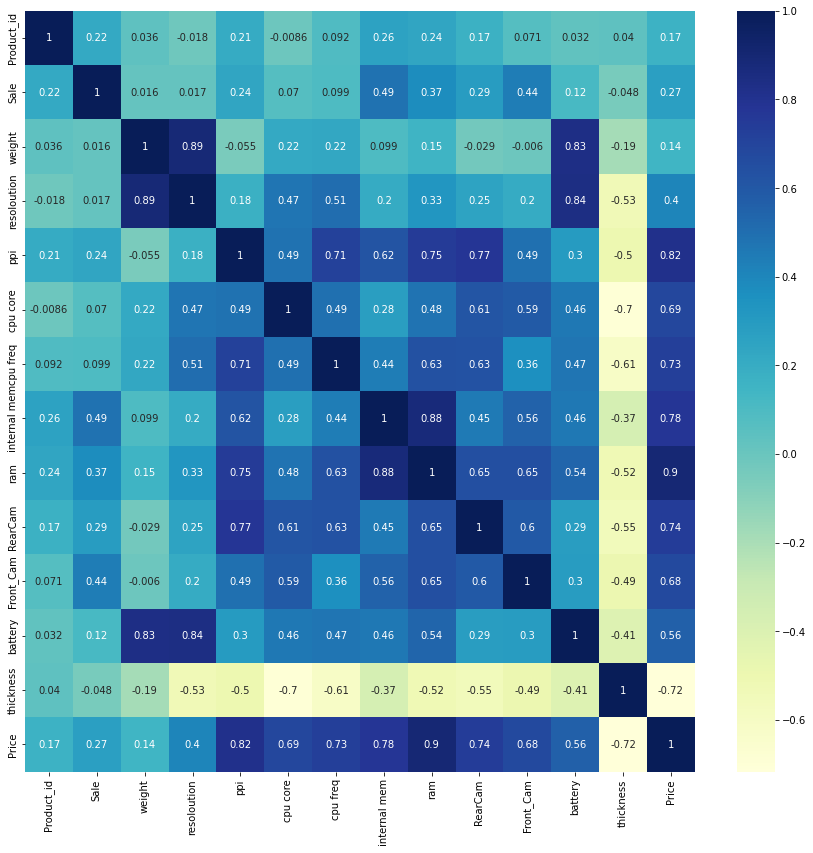

In [5]:
fig,ax=plt.subplots(figsize=(15,14))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True,cmap="YlGnBu")
plt.show()

## drop the less depend features 

In [6]:
df.drop(['Product_id','weight'],axis=1,inplace=True)

### create model with linear regression estimator

In [7]:
from sklearn.linear_model import LinearRegression
np.random.seed(7)
X=df.drop('Price',axis=1)
y=df['Price']
####
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2)
####
LR_model=LinearRegression()
LR_model.fit(train_x,train_y)

LinearRegression()

### make linear regression estimator prediction 

In [8]:
y_predict=LR_model.predict(test_x)

### evaluate the LR model with r2 score 

In [9]:
score=r2_score(test_y,y_predict)
print('r2 socre is: ',score)

r2 socre is:  0.9266294976783842


### create model with Elastic net estimator 

In [10]:
from sklearn.linear_model import ElasticNet

elastic_reg=ElasticNet(alpha=1.0)
elastic_reg.fit(train_x,train_y)

ElasticNet()

### make elastic net estimator prediction 

In [11]:
y_predict_elastic=elastic_reg.predict(test_x)

### evaluate the elastic net model with r2 score 

In [12]:
score_elastic=r2_score(test_y,y_predict_elastic)
print('r2 socre is: ',score_elastic)

r2 socre is:  0.9151575490492878


### create model with Lasso estimator 

In [13]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=1)
reg_lasso.fit(train_x,train_y)

Lasso(alpha=1)

### make Lasso estimator prediction 

In [14]:
y_predict_lasso=reg_lasso.predict(test_x)

### evaluate the model Laso with r2 score 

In [15]:
score_lasso=r2_score(test_y,y_predict_lasso)
print('r2 socre is: ',score_lasso)

r2 socre is:  0.9268853408915081


# make prediction using cross_val_score

### Linear regression cross validation

In [16]:
from sklearn.model_selection import cross_val_score
crossval_LR=cross_val_score(LR_model, X, y, cv=5,scoring='r2')
crossval_LR

array([0.83901372, 0.88185005, 0.94563038, 0.95673064, 0.73172034])

In [17]:
print('r2 socre is: ',np.mean(crossval_LR))

r2 socre is:  0.8709890266945411


### elastic net cross validation

In [18]:
from sklearn.model_selection import cross_val_score
crossval_elastic_net=cross_val_score(elastic_reg, X, y, cv=5,scoring='r2')
crossval_elastic_net

array([0.84936321, 0.86450423, 0.96366065, 0.93897921, 0.94002527])

In [19]:
print('r2 socre is: ',np.mean(crossval_elastic_net))

r2 socre is:  0.9113065151002244


### Lasso cross validation

In [20]:
from sklearn.model_selection import cross_val_score
crossval_lasso=cross_val_score(reg_lasso, X, y, cv=5,scoring='r2')
crossval_lasso

array([0.83927015, 0.88051641, 0.94706574, 0.9558764 , 0.7760249 ])

In [21]:
print('r2 socre is: ',np.mean(crossval_lasso))

r2 socre is:  0.8797507225330113


## plot the estimators mean r2 score 

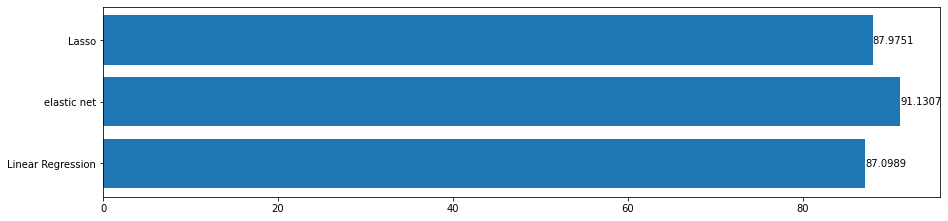

In [22]:
comparedict = {
  "Linear Regression": np.mean(crossval_LR)*100 ,
  "elastic net": np.mean(crossval_elastic_net)*100,
  "Lasso": np.mean(crossval_lasso)*100
}
fig, ax = plt.subplots(figsize=(15,3.5))
bars = ax.barh(range(len(comparedict)), list(comparedict.values()))
plt.yticks(range(len(comparedict)), list(comparedict.keys()))
for bars in ax.containers:
    ax.bar_label(bars)

* we saw that the `elastic net` is the best estimators for this prediction